<h1> Linear Regression using The Normal Equation </h1>

<p> In this Notebook we will make use of Linear Regression, and the Normal Equation to fit our data. The Portland Housing Data Set will serve as our toy data set </p>



In [361]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

<p> First we load our dataset </p>

In [362]:
data = genfromtxt('portland.csv', delimiter=',')

<p> Below is a Snapshot of the Data Set: </p>
<table class="data-table" align="left">
    <tr>
        <th>Area (Square Feet)</th>
        <th>Number of Rooms</th>
        <th>Price ($)</th>
    </tr>
    <tr>
        <td>2104</td>
        <td>3</td>
        <td>399900</td>
    </tr>
    <tr>
        <td>1600</td>
        <td>3</td>
        <td>329900</td>
    </tr>
    <tr>
        <td class="border-bottom">4478</td>
        <td class="border-bottom">5</td>
        <td class="border-bottom">699900</td>
    </tr>
</table>


<p> Before we start trying to fit our data, it's important to visualise it, but first, we extract the individual features out as follows: </p>

In [363]:
area = data[:, 0]
rooms =data[:, 1]
price = data[:, 2]

In [364]:
#Utility Function
def fitTheta(feature, theta):
    return np.dot(theta, feature)

In [367]:
def visualiseFeature(feature, featureLabel, thetaVal=None):
    fig = plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 10})
    plt.xlabel(featureLabel, fontsize=15)
    plt.ylabel("Price", fontsize=15)
    plt.scatter(feature, price, color="red", s=75)
    if(thetaVal):
        thetaFit = fitTheta(feature, thetaVal)
        plt.plot(feature, thetaFit)

<p>First we visualise The Area against the Price </p>

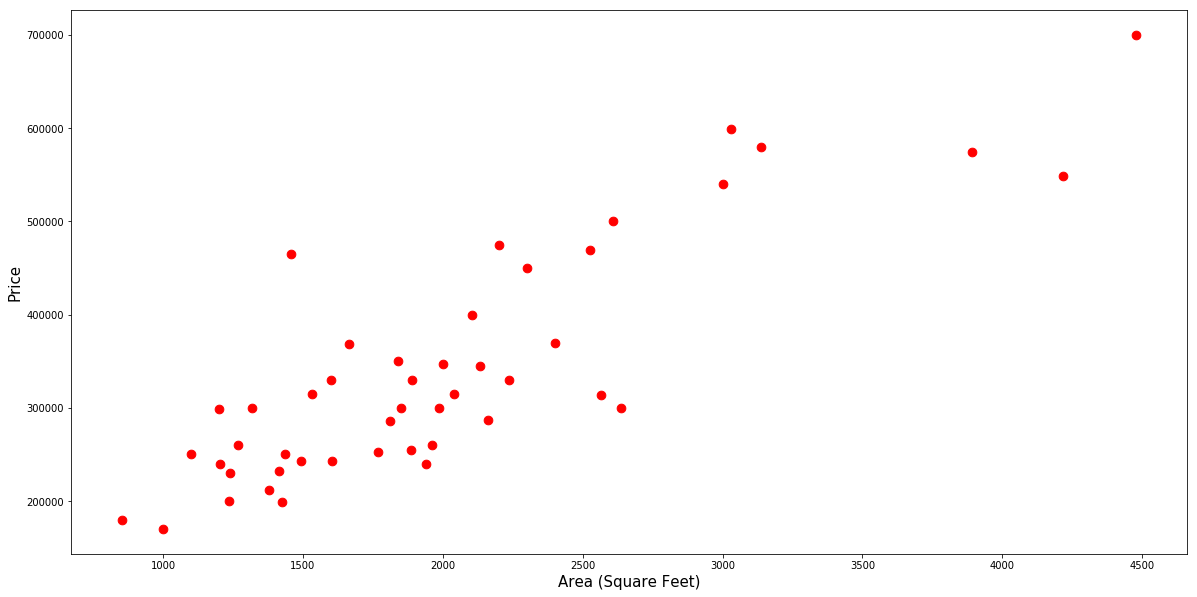

In [368]:
visualiseFeature(area, "Area (Square Feet)")

</p> From the visualisation above it is evident, that area and price are linearly related to each other</p><br/>
<p> Now we visualise the Number of Rooms against the Price of the House </p>

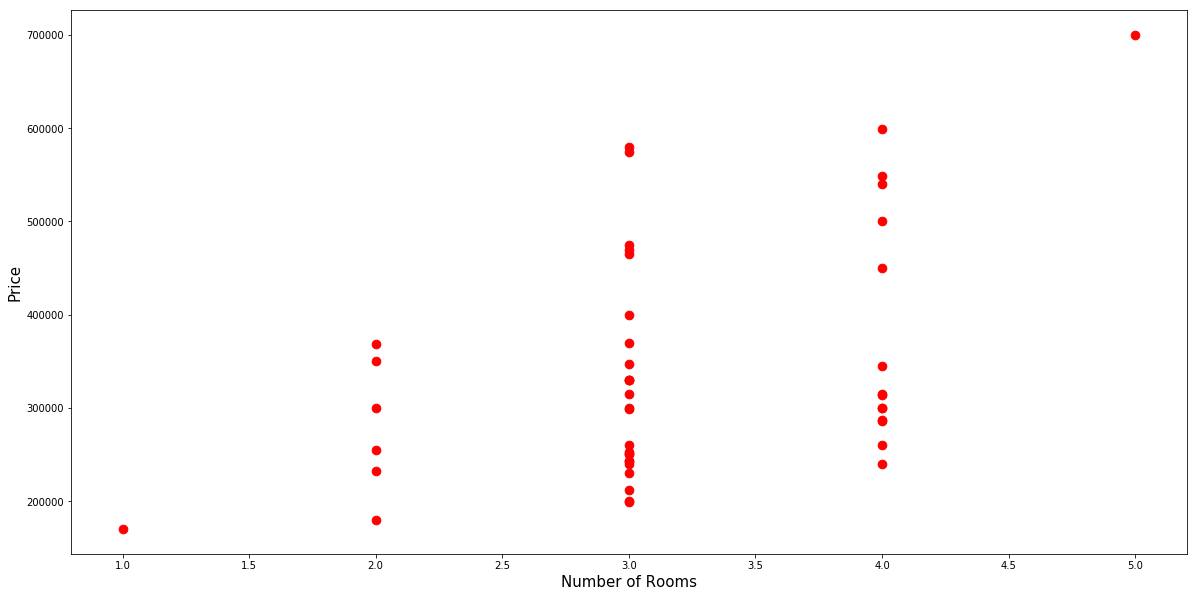

In [369]:
visualiseFeature(rooms, "Number of Rooms")

<p> Once again, the relationship between the Number of Rooms, and the Price of the House, appears to be Linear, although not as obvious as it was with the Area </p>

<p> Next, we define our Feature Matrix, and our Outcome/Target Vector </p>

In [370]:
X_data = data[:, 0:2] #Feature Matrix
y = data[:, 2] #Outcome Vector

<p> Before we make use of our data set we Pad X with a column of 1s to accommodate the intercept term in our weights </p><br/><h2>Essentially what we're doing is: </h2>
<img src= "matrix_transform.png" height="300" width="300"> </img>

In [371]:
X = np.c_[np.ones(X_data.shape[0]), X_data] #Pad column of 1s

<p> Now, we define our define a Cost Function that we can use to visualise how changing our weights directly affects it </p>

In [372]:
def getMSE(feature, thetaRange):
    costMatrix = np.repeat(price, thetaRange.shape[0]).reshape(price.shape[0], thetaRange.shape[0])
    costs = np.dot(np.asmatrix(feature).T, np.asmatrix(thetaRange)) - costMatrix
    MSE = (np.array((np.sum(costs, 0)))**2)/(2*price.shape[0])
    return np.array(MSE)[0]

In [373]:
def visualiseLoss(feature, featureName, startInterval, endInterval, stepSize=0.5, thetaVal=None):
    thetaRange = np.arange(startInterval, endInterval, stepSize)
    Loss = getMSE(feature, thetaRange)
    fig = plt.figure(figsize=(20, 10))
    plt.title("Loss Function for the Feature: {}".format(featureName), fontsize=25)
    plt.ylabel("Cost Function, J(Θ)", fontsize=15)
    plt.xlabel("Weight(s), Θ", fontsize=15)
    plt.plot(thetaRange, Loss, zorder=1)
    if(thetaVal):
        thetaLoss = getMSE(feature, np.array(thetaVal).reshape(1, 1))
        plt.scatter(thetaVal, thetaLoss, marker="x", linewidth=5, color="red", s=200, zorder=2)
        plt.annotate("Theta = {}".format(thetaVal), (thetaVal, thetaLoss), fontsize=25)

    

<p> After Repeated Trials we find that the Loss Function has its minima between the range -500 and 800 for Area </p>

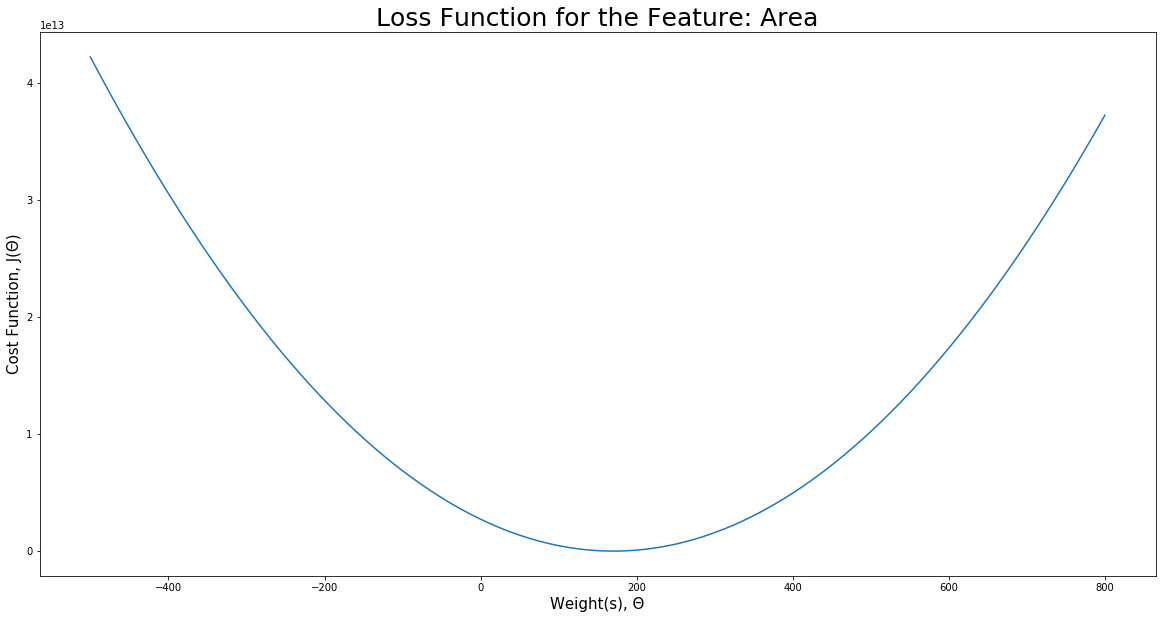

In [374]:
visualiseLoss(area, "Area", -500, 800)

<p> And for The Rooms Feature we find that the Loss Function has its minima between the range -40000 and 250000</p>

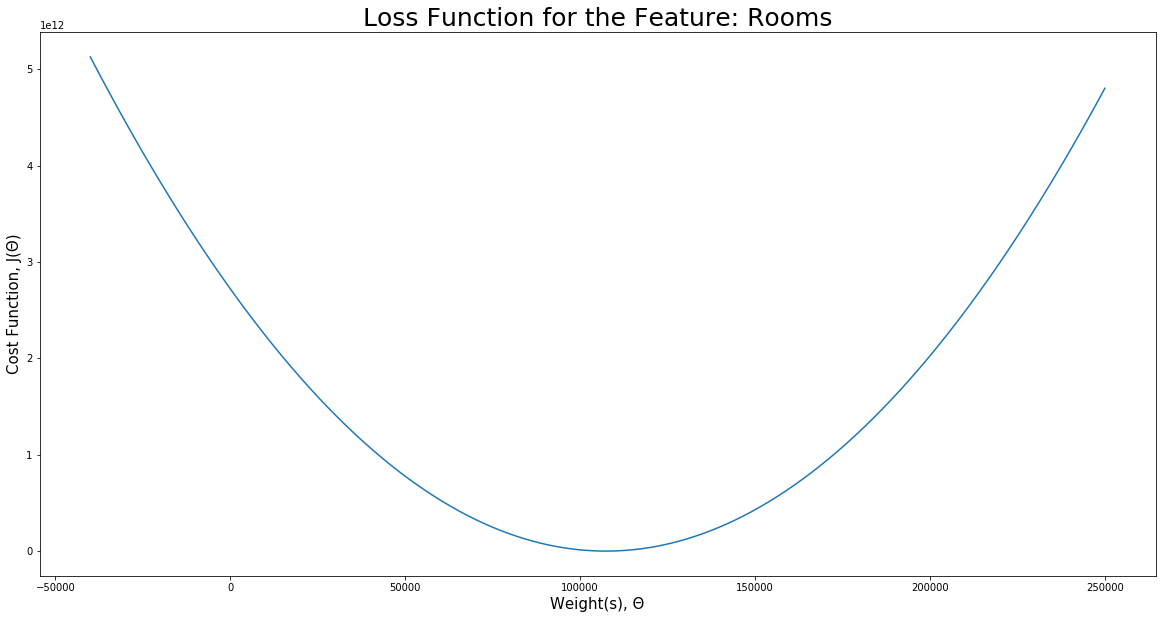

In [375]:
visualiseLoss(rooms, "Rooms", -40000, 250000)

<h2> Recall The Normal Equation: </h2>
<img src="Normal_Equation.png"> </img>

<p> But before we use the equation, we split our data set into Two Parts, Training and Test in the Ratio of 80:10

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<p> Now we will make use of the Equation </p>
<br/>
<p> We will Calculate the first Term, the inverse of the dot product of X' and X, as follows: </p>

In [377]:
firstTerm = np.linalg.inv(np.dot(X_train.T, X_train))

<p> Next, we calculate the second term, the dot product of X' and y, as follows: </p>

In [378]:
secondTerm = np.dot(X_train.T, y_train)

<p> Calculate the dot product of the two terms: </p>

In [379]:
Theta = np.dot(firstTerm, secondTerm)

<p> Now we can Visualise where Theta is with respect to our Loss Function for each Feature </p>
<br/>
<p> First for Area's Weight Term: </p>

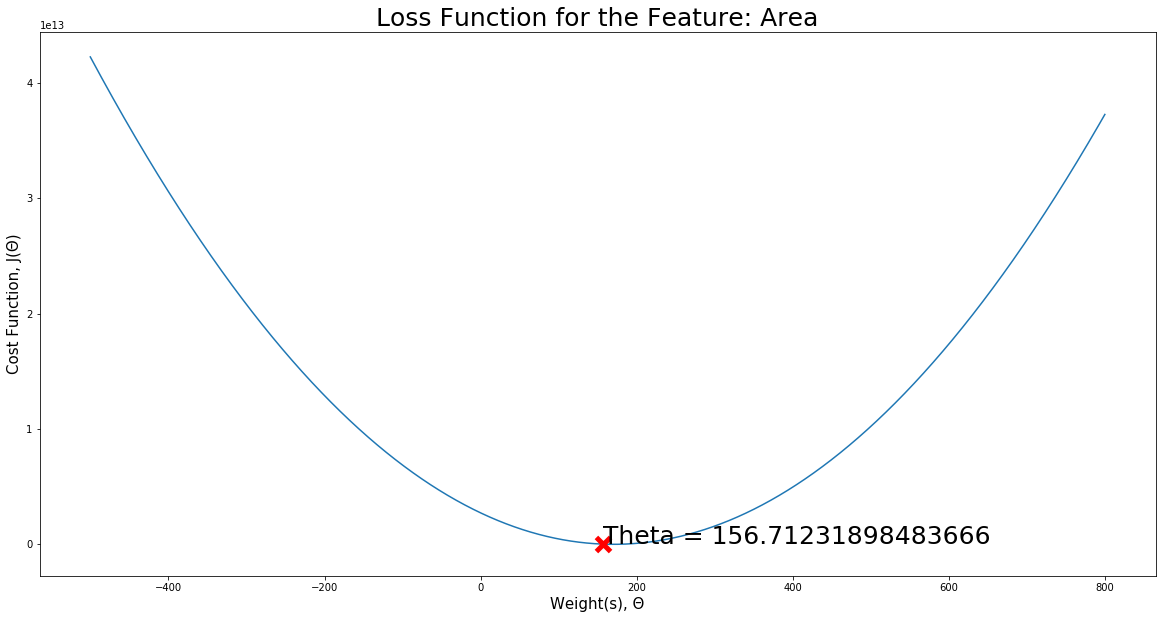

In [380]:
visualiseLoss(area, "Area", -500, 800, thetaVal=Theta[1])

<p> Followed by the Theta term for Rooms </p>

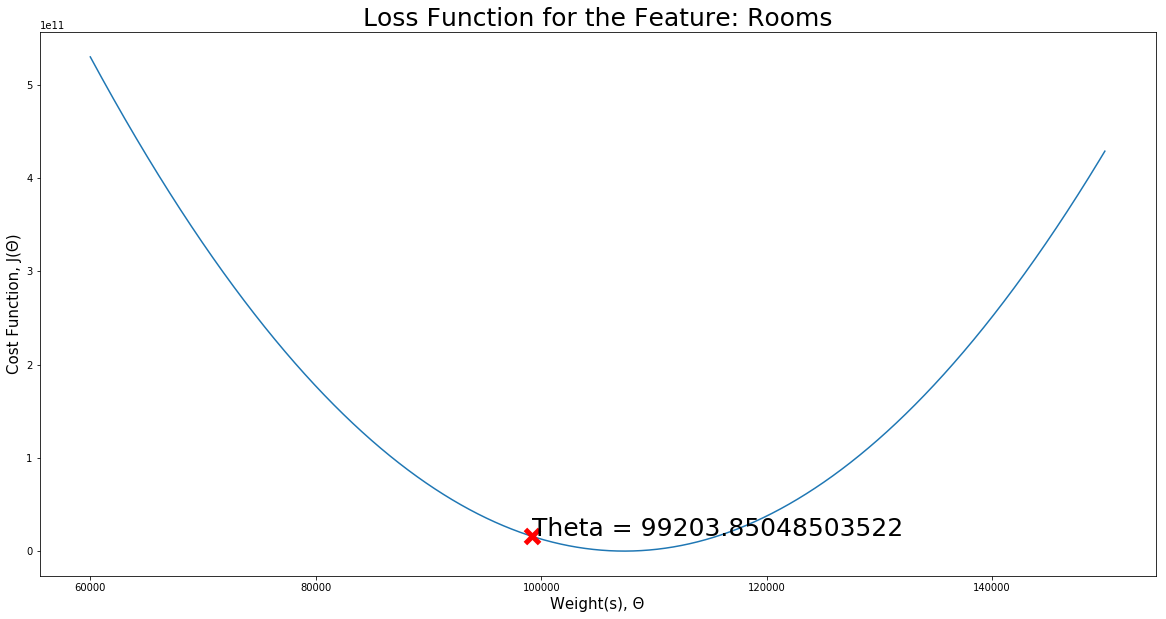

In [384]:
visualiseLoss(rooms, "Rooms", 60000, 150000, thetaVal=Theta[0])

<p> We can now visualise how this value of Theta fits our data set </p>
<br/>
<p> For Area: </p>

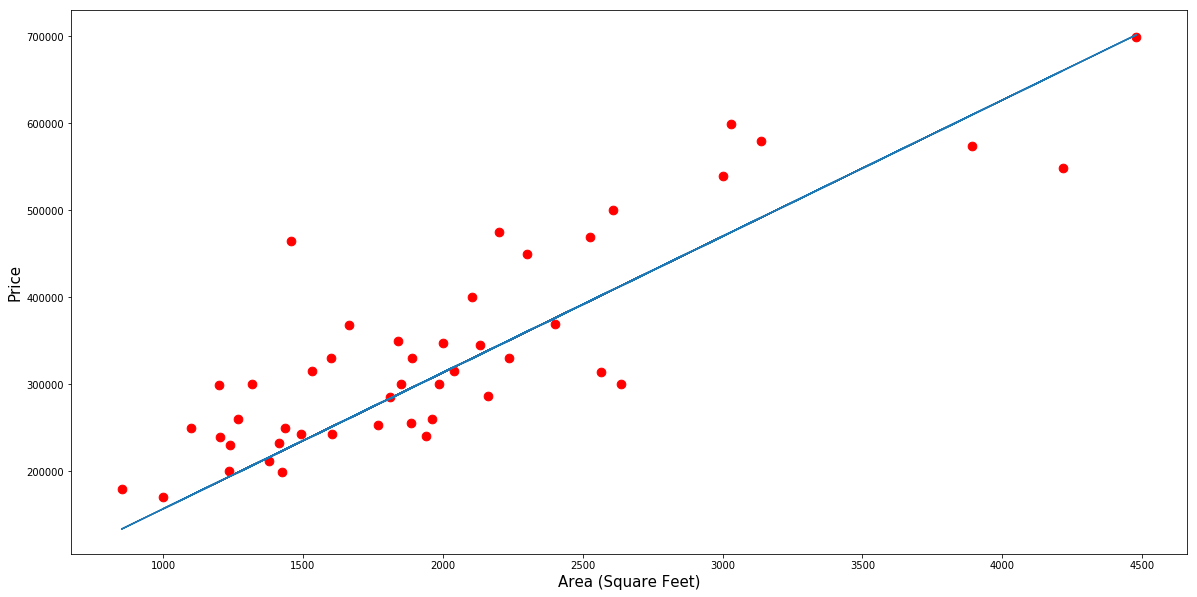

In [385]:
visualiseFeature(area, "Area (Square Feet)", thetaVal=Theta[1])

<p> For Number of Rooms: </p>

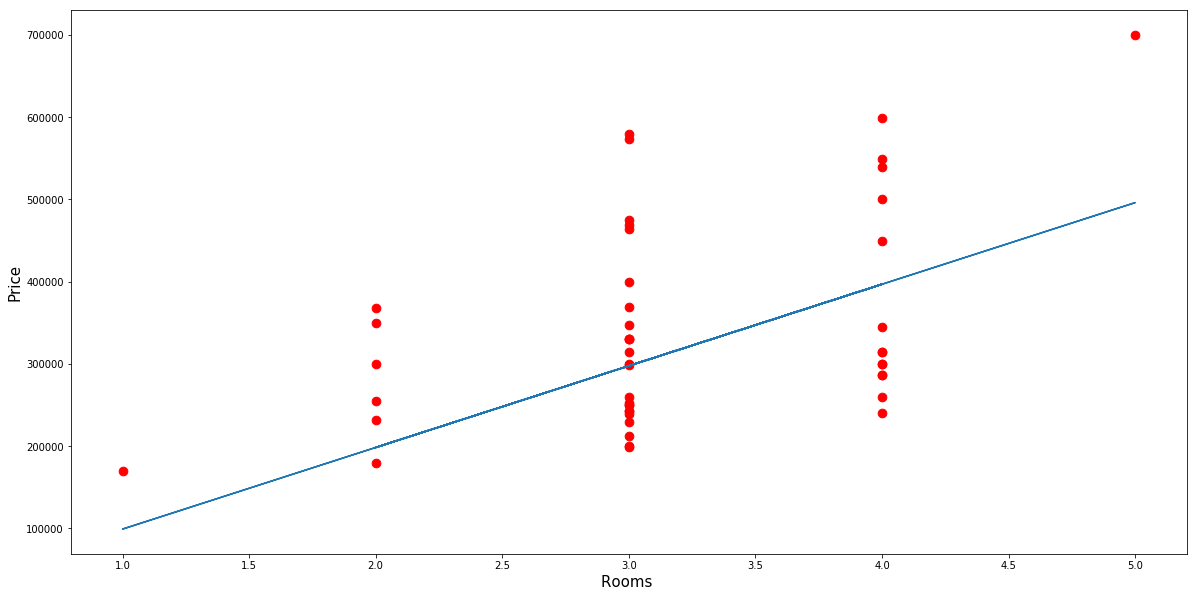

In [386]:
visualiseFeature(rooms, "Rooms ", thetaVal=Theta[0])

<h2> Comparision </h2>
<p> Now we compare the results predictions of our generated model with their true values from our data set. To further our comparision study, we even add the Regression results from Scikit-learn's Linear Regression Model </p>

In [387]:
normal_predictions = np.dot(X_test, Theta)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
sk_predictions = reg.predict(X_test)

In [388]:
def plotComparision(first, firstLabel, second, secondLabel):
    fig = plt.figure(figsize=(20, 10))
    firstPlot = plt.scatter(np.arange(1, 11), first, color="red", s=80, alpha=0.5)
    secondPlot = plt.scatter(np.arange(1, 11), second, color="green", marker="x",s=80, alpha=0.5)
    plt.title("{} and {}".format(firstLabel, secondLabel), fontsize="25")
    plt.legend([firstPlot, secondPlot], [firstLabel, secondLabel])
# plt.scatter(np.arange(1, 11), sk_predict, color="blue")

<p> First We compare our Normal Predictions with the True Values </p>

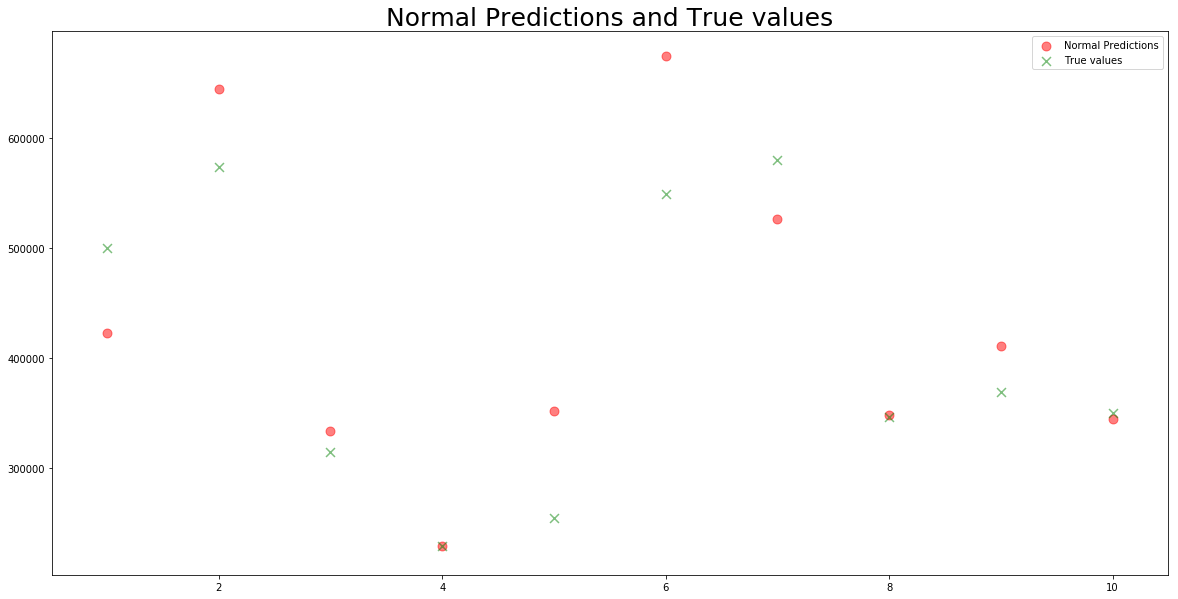

In [389]:
plotComparision(normal_predictions, "Normal Predictions", y_test, "True values")

<p> Next we compare Scikit-Learn's Linear Model with the True Values </p>

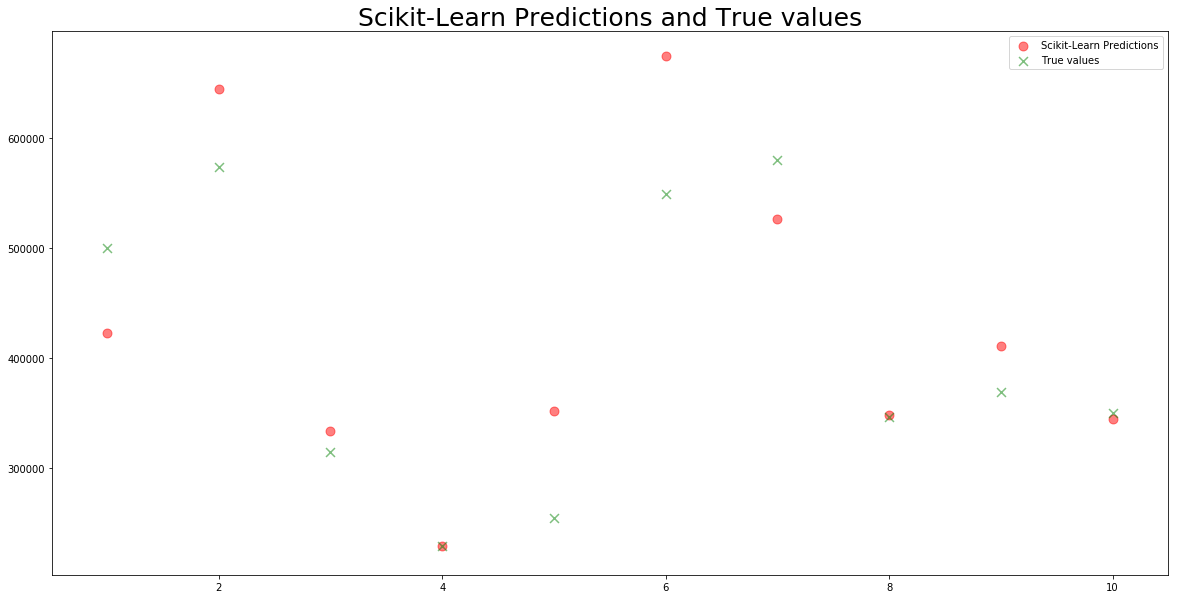

In [390]:
plotComparision(sk_predictions, "Scikit-Learn Predictions", y_test, "True values")

<p> Last we Compare our Normal Predicitions with Scikit-Learn's Predictions </p>

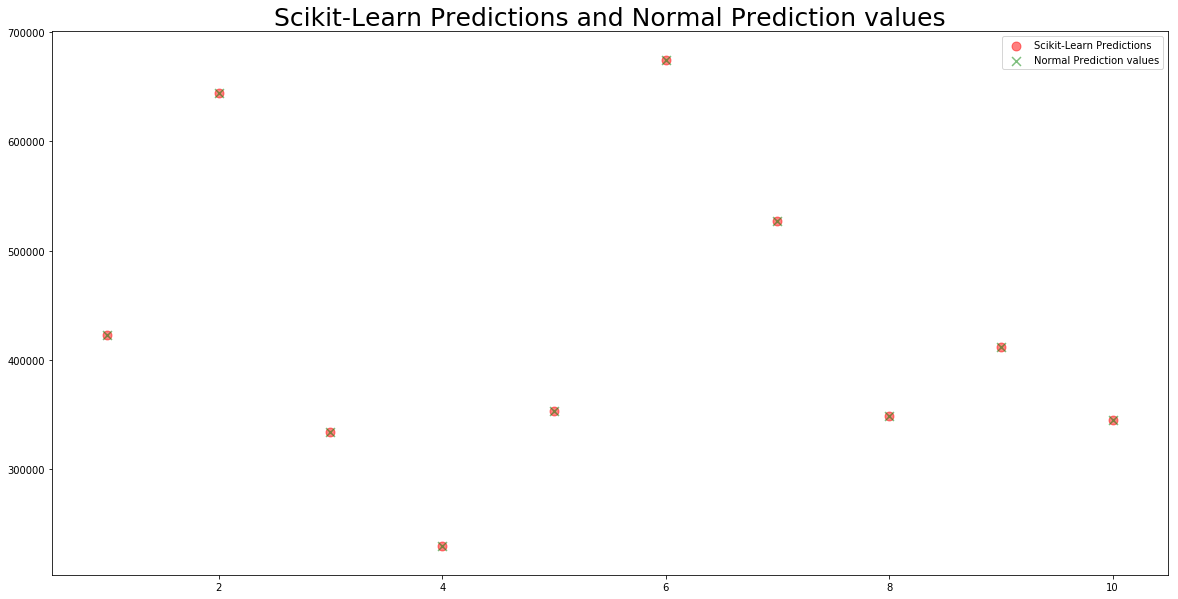

In [391]:
plotComparision(sk_predictions, "Scikit-Learn Predictions", normal_predictions, "Normal Prediction values")

<p> It is evident from the above graph that the results of Scikit-Learn seems to exactly match our Normal Equation Predictions, which is good reason to believe that the internal implementation of Scikit-Learn's LinearRegression.fit(X, y) method probably makes use of the Normal Equation as well. </p>